<a href="https://colab.research.google.com/github/sheikh495/database/blob/main/m10_9_coding_assignment_pythonandsqliteintegration_final_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Step 1: Set Up the Database

In [ ]:
from google.colab import files
uploaded = files.upload()  # Upload the chinook.db file


Saving chinook.db to chinook.db


# Step 2: Connecting to the Database

In [ ]:
import sqlite3

def connect_to_db(db_path):
    try:
        # Establish a connection to the SQLite database
        conn = sqlite3.connect(db_path)
        print("Connection successful!")
        return conn
    except sqlite3.Error as e:
        print(f"Error connecting to database: {e}")
        return None

# Path to the uploaded chinook.db file in Google Colab
db_path = "/content/chinook.db"

# Connect to the database
conn = connect_to_db(db_path)


Connection successful!


# Step 3: Read Records

**View all employees in the employees table:**

In [ ]:
#import sqlite3
import pandas as pd
from IPython.display import HTML, display

# Connect to the SQLite database (make sure the file path is correct)
#conn = sqlite3.connect('/content/chinook.db')

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Display centered text with font size 20, bold, and green color
display(HTML('<p style="font-size:20px; font-weight:bold; text-align:center; color:green;">View all employees in the employees table:</p>'))

# Test: View all employees and display the table
if conn:
    employees_df = view_all_employees(conn)

    if not employees_df.empty:
        display(employees_df)  # Displays as a table in Colab
    else:
        display(HTML('<p style="font-size:16px; color:red; text-align:center;">No employees found.</p>'))


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


OR

In [ ]:
import pandas as pd
from IPython.display import HTML, display

# Function to connect to the SQLite database
def connect_to_database(db_path):
    try:
        import sqlite3  # Import inside the function to reduce scope
        conn = sqlite3.connect(db_path)
        return conn
    except Exception as e:
        display(HTML(f'<p style="font-size:16px; color:red; text-align:center;">Error connecting to the database: {e}</p>'))
        return None

# Function to fetch and display employees
def fetch_and_display_employees(conn):
    try:
        query = "SELECT * FROM employees"
        employees_df = pd.read_sql_query(query, conn)

        if not employees_df.empty:
            display(HTML('<p style="font-size:20px; font-weight:bold; text-align:center; color:green;">Employees Table</p>'))
            display(employees_df.style.set_table_styles([{
                'selector': 'th',
                'props': [('text-align', 'center'), ('font-weight', 'bold'), ('color', 'blue')]
            }, {
                'selector': 'td',
                'props': [('text-align', 'center')]
            }]))
        else:
            display(HTML('<p style="font-size:16px; color:orange; text-align:center;">No employees found in the database.</p>'))
    except Exception as e:
        display(HTML(f'<p style="font-size:16px; color:red; text-align:center;">Error retrieving data: {e}</p>'))

# Connect to the database (update the path as per your database file)
db_path = '/content/chinook.db'
connection = connect_to_database(db_path)

# Fetch and display employees
if connection:
    fetch_and_display_employees(connection)
    connection.close()


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,nan,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.000000,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.000000,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.000000,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.000000,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.000000,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.000000,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.000000,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


In [ ]:
import pandas as pd
from IPython.display import HTML, display

def connect_to_database(db_path):
    """
    Establishes a connection to the SQLite database.

    Parameters:
    db_path (str): Path to the SQLite database file.

    Returns:
    sqlite3.Connection: A connection object to the database, or None if an error occurs.
    """
    try:
        import sqlite3
        connection = sqlite3.connect(db_path)
        return connection
    except Exception as error:
        display(HTML(f'<p style="font-size:16px; color:red; text-align:center;">'
                     f'Error connecting to the database: {error}</p>'))
        return None


def fetch_employees(conn):
    """
    Fetches all records from the employees table in the database.

    Parameters:
    conn (sqlite3.Connection): Active database connection.

    Returns:
    pandas.DataFrame: DataFrame containing employee records, or an empty DataFrame if no records are found.
    """
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except Exception as error:
        display(HTML(f'<p style="font-size:16px; color:red; text-align:center;">'
                     f'Error retrieving employee data: {error}</p>'))
        return pd.DataFrame()


def display_employees(df):
    """
    Displays employee records in a styled table format.

    Parameters:
    df (pandas.DataFrame): DataFrame containing employee records.
    """
    if df.empty:
        display(HTML('<p style="font-size:16px; color:orange; text-align:center;">'
                     'No employee records found.</p>'))
    else:
        display(HTML('<p style="font-size:20px; font-weight:bold; text-align:center; color:green;">Employees Table</p>'))
        styled_df = df.style.set_table_styles([{
            'selector': 'th',
            'props': [('text-align', 'center'), ('font-weight', 'bold'), ('color', 'blue')]
        }, {
            'selector': 'td',
            'props': [('text-align', 'center')]
        }])
        display(styled_df)


# Main Execution Section
if __name__ == "__main__":
    DATABASE_PATH = '/content/chinook.db'  # Update path as required
    connection = connect_to_database(DATABASE_PATH)

    if connection:
        employees_df = fetch_employees(connection)
        display_employees(employees_df)
        connection.close()


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,nan,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.000000,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.000000,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.000000,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.000000,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.000000,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.000000,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.000000,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


                 Title  Count
0      General Manager      1
1           IT Manager      1
2             IT Staff      2
3        Sales Manager      1
4  Sales Support Agent      3


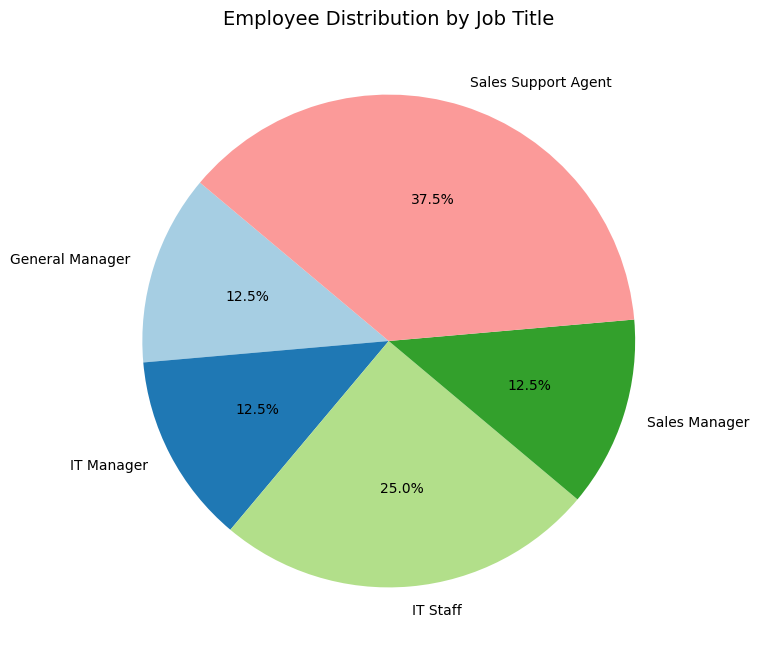

In [ ]:
import matplotlib.pyplot as plt

# Function to retrieve employee data grouped by title
def get_employee_count_by_title(conn):
    query = """
    SELECT Title, COUNT(*) as Count
    FROM employees
    GROUP BY Title
    """
    try:
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error fetching data: {e}")
        return None


# Fetch data
if conn:
    employee_counts = get_employee_count_by_title(conn)

    if employee_counts is not None:
       # Display the data as a DataFrame
        print(employee_counts)
        # Pie chart visualization
        plt.figure(figsize=(8, 8))
        plt.pie(
            employee_counts['Count'],
            labels=employee_counts['Title'],
            autopct='%1.1f%%',
            startangle=140,
            colors=plt.cm.Paired.colors
        )
        plt.title('Employee Distribution by Job Title', fontsize=14)
        plt.show()


**View employees by job title:**

In [ ]:
from IPython.display import HTML, display

# Function to view employees by job title
def view_employee_by_title(conn, title):
    try:
        query = "SELECT * FROM employees WHERE Title = ?"
        df = pd.read_sql_query(query, conn, params=(title,))
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees by title: {e}")

# Test: View all employees
if conn:
    # Display all employees
    display(HTML('<p style="font-size:20px; font-weight:bold; text-align:center; color:green;">All Employees:</p>'))
    employees_df = view_all_employees(conn)
    if not employees_df.empty:
        display(employees_df)
    else:
        display(HTML('<p style="font-size:16px; color:red; text-align:center;">No employees found.</p>'))

    # Example: View employees by title "Sales Support Agent"
    title = "Sales Support Agent"  # Modify this as needed
    display(HTML('<p style="font-size:25px; font-weight:bold; text-align:center; color:blue;">Employees with \'Sales Support Agent\' title:</p>'))
    employees_by_title_df = view_employee_by_title(conn, title)
    if not employees_by_title_df.empty:
        display(employees_by_title_df)
    else:
        display(HTML('<p style="font-size:16px; color:red; text-align:center;">No employees found with the specified title.</p>'))


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,3,Peacock,Jane,Sales Support Agent,2,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
1,4,Park,Margaret,Sales Support Agent,2,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
2,5,Johnson,Steve,Sales Support Agent,2,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com


# Step 4: Create Records

In [ ]:
#import sqlite3
#import pandas as pd
from IPython.display import HTML, display

# Connect to the SQLite database
#conn = sqlite3.connect('/content/chinook.db')

# Function to add a new employee
def add_employee(conn, employee_data):
    try:
        query = """
        INSERT INTO employees (FirstName, LastName, Title, ReportsTo, BirthDate, HireDate, Address, City, State, Country, PostalCode, Phone, Fax, Email)
        VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """
        conn.execute(query, employee_data)
        conn.commit()
        display(HTML("<p style='color: blue; font-size: 25px; text-align: center;'>Employee added successfully!</p>"))
    except sqlite3.Error as e:
        print(f"Error adding employee: {e}")

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Sample data to add a new employee
new_employee = ('Sheikh', 'Uddin', 'Sales Manager', 2, '1985-07-15', '2024-11-01', '1234 Elm St', 'Fairfax', 'VA', 'USA', '22030', '555-1234', '555-5678', 'suddin@example.com')

# Test: Add a new employee
if conn:
    add_employee(conn, new_employee)

    # Display all employees after adding the new one
    employees_df = view_all_employees(conn)
    # Highlight newly added employee
    highlight = employees_df['FirstName'] == 'Sheikh'  # Customize the highlight condition
    styled_table = employees_df.style.apply(lambda x: ['background-color: yellow' if v else '' for v in highlight], axis=0)
    display(styled_table)


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,nan,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.000000,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.000000,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.000000,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.000000,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.000000,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.000000,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.000000,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Manager,2.000000,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com


# Step 5: Update Records

In [ ]:
import sqlite3
import pandas as pd
from IPython.display import HTML, display

# Function to update employee title
def update_employee_title(conn, employee_id, new_title):
    try:
        query = "UPDATE employees SET Title = ? WHERE EmployeeID = ?"
        conn.execute(query, (new_title, employee_id))
        conn.commit()
        # Display success message
        display(HTML(f"<p style='color: blue; font-size: 25px; text-align: center;'>Employee ID {employee_id} title updated to {new_title}</p>"))
    except sqlite3.Error as e:
        print(f"Error updating employee title: {e}")

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Test: Update the title of an existing employee (Employee ID 9)
if conn:
    update_employee_title(conn, 9, 'Sales Agent')

    # Display all employees after the update
    employees_df = view_all_employees(conn)

    # Display the table of employees without highlighting
    display(employees_df)


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Agent,2.0,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com


# Step 6: Delete Records

In [ ]:
def delete_employee(conn, employee_id):
    try:
        query = "DELETE FROM employees WHERE EmployeeID = ?"
        conn.execute(query, (employee_id,))
        conn.commit()
        print(f"Employee ID {employee_id} deleted successfully!")
    except sqlite3.Error as e:
        print(f"Error deleting employee: {e}")

# Test: Delete the employee with ID 10
if conn:
    delete_employee(conn, 10)


Employee ID 10 deleted successfully!


In [ ]:
#import sqlite3
import pandas as pd
from IPython.display import display, HTML

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# View employees after deletion
if conn:
    # Display the styled message
    display(HTML("<p style='color: blue; font-size: 25px; text-align: center;'>View employees after deletion</p>"))

    # Retrieve all employees after deletion
    employees_after_deletion = view_all_employees(conn)

    # Check if there are any employees after deletion
    if not employees_after_deletion.empty:
        display(employees_after_deletion)  # Display the employees table
    else:
        print("No employees found.")


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Agent,2.0,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com


# Step 7: Close the Connection

In [ ]:
# Close the database connection
if conn:
    conn.close()
    display(HTML("<p style='color: blue; font-size: 25px; text-align: center;'>Database connection closed.</p>"))
   # print("Database connection closed.")


In [ ]:
import nbformat
from nbconvert import HTMLExporter
from IPython.display import HTML, display
from pathlib import Path

def load_notebook(file_path):
    """
    Load a Jupyter notebook (.ipynb) file.

    Parameters:
    file_path (str): The path to the notebook file.

    Returns:
    nbformat.NotebookNode: Parsed notebook object if successful, None otherwise.
    """
    try:
        if not Path(file_path).exists():
            raise FileNotFoundError(f"File not found at: {file_path}")

        with open(file_path, 'r', encoding='utf-8') as notebook_file:
            notebook = nbformat.read(notebook_file, as_version=4)

        display(HTML('<p style="font-size:16px; color:green; text-align:center;">Notebook successfully loaded.</p>'))
        return notebook
    except FileNotFoundError as fnf_error:
        display(HTML(f'<p style="font-size:16px; color:red; text-align:center;">{fnf_error}</p>'))
        return None
    except Exception as error:
        display(HTML(f'<p style="font-size:16px; color:red; text-align:center;">Error loading notebook: {error}</p>'))
        return None


def convert_to_html(notebook, output_path):
    """
    Convert a Jupyter notebook to an HTML file.

    Parameters:
    notebook (nbformat.NotebookNode): Parsed notebook object.
    output_path (str): The path where the HTML file will be saved.

    Returns:
    bool: True if conversion is successful, False otherwise.
    """
    try:
        html_exporter = HTMLExporter()
        html_exporter.template_name = 'classic'  # Change template if needed
        body, _ = html_exporter.from_notebook_node(notebook)

        with open(output_path, 'w', encoding='utf-8') as html_file:
            html_file.write(body)

        display(HTML(f'<p style="font-size:16px; color:green; text-align:center;">HTML file successfully created at: <code>{output_path}</code></p>'))
        return True
    except Exception as error:
        display(HTML(f'<p style="font-size:16px; color:red; text-align:center;">Error during HTML conversion: {error}</p>'))
        return False


def main(notebook_path, html_output_path):
    """
    Main function to convert a Jupyter notebook to HTML format.

    Parameters:
    notebook_path (str): The path to the input notebook file.
    html_output_path (str): The path to save the converted HTML file.
    """
    display(HTML('<p style="font-size:20px; font-weight:bold; text-align:center; color:blue;">Starting Jupyter Notebook to HTML Conversion</p>'))

    notebook = load_notebook(notebook_path)
    if notebook:
        success = convert_to_html(notebook, html_output_path)
        if success:
            display(HTML(f'<p style="font-size:16px; color:green; text-align:center;">Conversion completed. Download the HTML file using the download link.</p>'))
            download_html(html_output_path)


def download_html(file_path):
    """
    Provide a download link for the converted HTML file.

    Parameters:
    file_path (str): The path to the HTML file.
    """
    try:
        if Path(file_path).exists():
            from google.colab import files
            files.download(file_path)
            display(HTML('<p style="font-size:16px; color:green; text-align:center;">File is ready for download.</p>'))
        else:
            raise FileNotFoundError(f"File not found for download at: {file_path}")
    except Exception as error:
        display(HTML(f'<p style="font-size:16px; color:red; text-align:center;">Error during download: {error}</p>'))


# Update these paths to your notebook and desired HTML output
notebook_path = '/content/M10_9_Coding_Assignment_PythonandSQLiteIntegration_Final (1).ipynb'  # Replace with your notebook path
html_output_path = '/content/output_notebook.html'  # Replace with desired output path

# Execute the script
if __name__ == "__main__":
    main(notebook_path, html_output_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Step 1: Install necessary tools and dependencies
!apt-get update
!apt-get install -y pandoc
!apt-get install -y texlive-xetex texlive-fonts-recommended texlive-latex-recommended

# Step 2: Specify the notebook file name
notebook_filename = "/content/M10_9_Coding_Assignment_PythonandSQLiteIntegration_Final (1).ipynb"  # Replace with your notebook's name

# Step 3: Convert the notebook to PDF
try:
    print(f"Converting {notebook_filename} to PDF...")
    !jupyter nbconvert --to pdf "{notebook_filename}"
    print("Conversion successful!")

    # Extract PDF file name
    pdf_filename = notebook_filename.replace(".ipynb", ".pdf")

    # Provide the PDF for download
    from google.colab import files
    files.download(pdf_filename)
except Exception as e:
    print("Error during conversion:", e)


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:3 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:4 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:5 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:6 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,619 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:10 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,506 kB]
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Get:12 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:13 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import sqlite3
from IPython.display import display, HTML
import pandas as pd

# Connect to the SQLite database (ensure the correct path to your database)
conn = sqlite3.connect('/content/chinook.db')  # Update with your actual database file path

# Function to view all employees
def view_all_employees(conn):
    try:
        query = "SELECT * FROM employees"
        df = pd.read_sql_query(query, conn)
        return df
    except sqlite3.Error as e:
        print(f"Error retrieving employees: {e}")

# Display centered text with font size 20, bold, and green color
display(HTML('<p style="font-size:20px; font-weight:bold; text-align:center; color:green;">View all employees in the employees table:</p>'))

# Test: View all employees and display the table
if conn:
    employees_df = view_all_employees(conn)

    if not employees_df.empty:
        display(employees_df)  # Displays as a table in Colab
    else:
        display(HTML('<p style="font-size:16px; color:red; text-align:center;">No employees found.</p>'))

# Close the database connection
if conn:
    conn.close()
    # Display message in the notebook using HTML
    display(HTML("<p style='color: blue; font-size: 25px; text-align: center;'>Database connection closed.</p>"))


,EmployeeId,LastName,FirstName,Title,ReportsTo,BirthDate,HireDate,Address,City,State,Country,PostalCode,Phone,Fax,Email
0,1,Adams,Andrew,General Manager,NaN,1962-02-18 00:00:00,2002-08-14 00:00:00,11120 Jasper Ave NW,Edmonton,AB,Canada,T5K 2N1,+1 (780) 428-9482,+1 (780) 428-3457,andrew@chinookcorp.com
1,2,Edwards,Nancy,Sales Manager,1.0,1958-12-08 00:00:00,2002-05-01 00:00:00,825 8 Ave SW,Calgary,AB,Canada,T2P 2T3,+1 (403) 262-3443,+1 (403) 262-3322,nancy@chinookcorp.com
2,3,Peacock,Jane,Sales Support Agent,2.0,1973-08-29 00:00:00,2002-04-01 00:00:00,1111 6 Ave SW,Calgary,AB,Canada,T2P 5M5,+1 (403) 262-3443,+1 (403) 262-6712,jane@chinookcorp.com
3,4,Park,Margaret,Sales Support Agent,2.0,1947-09-19 00:00:00,2003-05-03 00:00:00,683 10 Street SW,Calgary,AB,Canada,T2P 5G3,+1 (403) 263-4423,+1 (403) 263-4289,margaret@chinookcorp.com
4,5,Johnson,Steve,Sales Support Agent,2.0,1965-03-03 00:00:00,2003-10-17 00:00:00,7727B 41 Ave,Calgary,AB,Canada,T3B 1Y7,1 (780) 836-9987,1 (780) 836-9543,steve@chinookcorp.com
5,6,Mitchell,Michael,IT Manager,1.0,1973-07-01 00:00:00,2003-10-17 00:00:00,5827 Bowness Road NW,Calgary,AB,Canada,T3B 0C5,+1 (403) 246-9887,+1 (403) 246-9899,michael@chinookcorp.com
6,7,King,Robert,IT Staff,6.0,1970-05-29 00:00:00,2004-01-02 00:00:00,590 Columbia Boulevard West,Lethbridge,AB,Canada,T1K 5N8,+1 (403) 456-9986,+1 (403) 456-8485,robert@chinookcorp.com
7,8,Callahan,Laura,IT Staff,6.0,1968-01-09 00:00:00,2004-03-04 00:00:00,923 7 ST NW,Lethbridge,AB,Canada,T1H 1Y8,+1 (403) 467-3351,+1 (403) 467-8772,laura@chinookcorp.com
8,9,Uddin,Sheikh,Sales Agent,2.0,1985-07-15,2024-11-01,1234 Elm St,Fairfax,VA,USA,22030,555-1234,555-5678,suddin@example.com
